<a href="https://colab.research.google.com/github/cherlimSG/ML/blob/main/PCA_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing Principal Component Analysis
Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in Introducing Scikit-Learn. Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 200 points:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


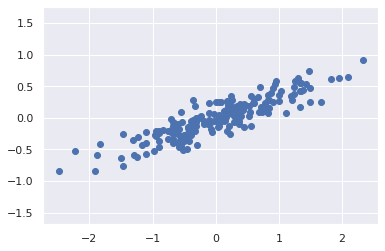

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in In Depth: Linear Regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [ ]:
X[0:3, 0:2]

array([[-0.62530162, -0.17006366],
       [ 0.96069503,  0.5909006 ],
       [-0.59854339, -0.40259339]])

In [ ]:
#Find the shape of X
X.shape

(200, 2)

### Question: What is the shape of X?
Ans: 200 x 2

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
pca.components_.shape

(2, 2)

### Question what is the dimension of the pca components matrix?
Ans: 2 x 2

### The dimension of the pca components matrix, say n is always n is equal to the square of the shape of X
### Question: Is the above statement true?
**Ans**: PCA components in sklearn has a shape of # of components (n_components) x number of features (K). If no value is specified for n_components in the sklearn model, n_components will take the minimum of (#samples, #features). For sample size greater than #features, this means the pca.components_ matrix will be a NxN or KxK since N=K, i.e. the number of components equals to the number of features. 

For example, for a dataset of 10 features, if we use the default setting of PCA, the pca.components_ matrix will be 10x10.

This question asks if the pca.components_ matrix has a shape equal to the square of the shape of X (which has a dimension of #samples x K). **Hence, the answer is NO.**

 

In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


### Is there a dominance explained variance?
Ans: yes

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

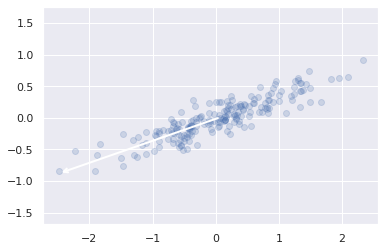

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

[(-3.0, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

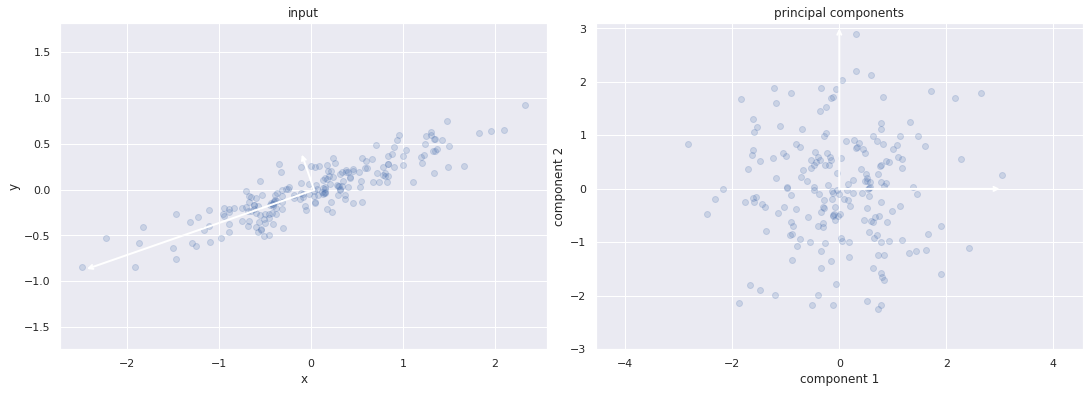

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

#fig.savefig('figures/05.09-PCA-rotation.png')

The above graph (left handside) shows the importance of the vector (the longer the vector, the more important are the values projected on it). 

### Question: Do you think we can reduce the features of X from 2 to 1?
Ans: yes

https://plotly.com/python/pca-visualization/

In [ ]:
#Set pca n_component =1
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=1, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)


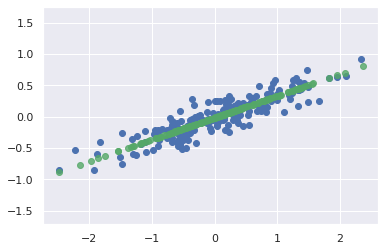

In [ ]:
X_inverse = pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_inverse[:, 0], X_inverse[:, 1], alpha=0.8, c='g')
plt.axis('equal');

# Experiment PCA on the wine dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

url = 'https://raw.githubusercontent.com/cherlim/NP/main/wine.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [ ]:
le = LabelEncoder()
df['Class']=le.fit_transform(df['Class'])

In [ ]:
X = df.iloc[:, 1:-1]
y = df['Class']

In [ ]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
X.shape

(178, 13)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
data = pca.fit_transform(X)

In [ ]:
pca.components_.shape

(13, 13)

# List the pca.components_ matrix

Index is pca components PC1 to PC13 since no value is provided in the PCA model. n_components id default to the min(#samples, #features). In this case, we have #features=13.

**The pca.components_ matrix has a dimension of 13x13.**

For each row, value under each feature is called feature score which represents 'how much' the feature influences the PC. The higher the absolute value, the higher the influence on the principal component (PC1). Hence in row 0 (PC1), the feature that has the highest influence is "proline" (score = 0.999823).

Similarly, for row 1 (PC2), the feature that has the highest influence is magnesium with a feature score of 0.999344. etc.

In [ ]:
df_components = pd.DataFrame(pca.components_, columns=list(X.columns))

In [ ]:
df_components

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.001659,-0.000681,0.000195,-0.004671,0.017868,0.000990,0.001567,-0.000123,0.000601,0.002327,0.000171,0.000705,0.999823
1,0.001203,0.002155,0.004594,0.026450,0.999344,0.000878,-0.000052,-0.001354,0.005004,0.015100,-0.000763,-0.003495,-0.017774
2,-0.016874,-0.122003,-0.051987,-0.938593,0.029780,0.040485,0.085443,-0.013511,0.024659,-0.291398,0.025978,0.070324,-0.004529
3,-0.141447,-0.160390,0.009773,0.330965,0.005394,0.074585,0.169087,-0.010806,0.050121,-0.878894,0.060035,0.178200,0.003113
4,0.020337,-0.612883,0.020176,0.064352,-0.006149,0.315245,0.524761,-0.029648,0.251183,0.331747,0.051524,0.260639,-0.002299
5,0.194120,0.742473,0.041753,-0.024065,-0.001924,0.278717,0.433598,-0.021953,0.241884,0.002740,-0.023776,0.288913,-0.001212
6,-0.923280,0.150110,-0.045010,-0.031527,-0.001797,0.020186,0.038869,0.004665,0.309799,0.112837,-0.030820,-0.101974,0.001076
7,-0.284821,0.064674,0.149340,-0.015154,0.003552,0.177238,0.248117,-0.006498,-0.870433,0.081287,0.002952,0.186715,-0.000010
8,-0.086601,-0.015662,-0.073650,-0.002045,0.001964,-0.255673,-0.378307,-0.036752,0.051520,0.099029,-0.033065,0.873747,0.000073
9,-0.002245,-0.018509,-0.086800,0.003554,-0.000041,0.847195,-0.520138,0.037713,0.009723,-0.023147,-0.038470,0.017017,0.000049
